<a href="https://colab.research.google.com/github/mv2731/colab/blob/main/ACB%20Data%20Analysis%20Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACB Data Analysis Quiz

The linked dataset contains a matrix of 14131 features (rows) measured across 123 samples (columns).  

The following background is not necessary to address the problems, but provides some context:  The data corresponds to an experiment where RNA was sequenced from many single cells in a population.  Rows correspond to genes.  Columns correspond to cells.  Values correspond to the counts of a given gene in a given cell.

## Question 1.

We are interested in finding patterns in these data.  Are there groups of samples that “behave” similarly?  Are there important characteristics of the dataset that we need to consider in analyzing the data?  Tell us some interesting things about this dataset (related or unrelated to the points above).

## Observations

One thing I notice off the bat: the dataset is pretty high dimensional. There are only 123 samples (columns, cells) and an overwhelming 14131 features (rows, gene counts). It is also important to note that the data is not labeled, and we should not apply supervised learning techniques.

In [1]:
# Upload file and load data
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving EngreitzLabACBDataSet.txt to EngreitzLabACBDataSet.txt
User uploaded file "EngreitzLabACBDataSet.txt" with length 3500008 bytes


In [2]:
# Read file content into a dataframe
cell_df = pd.read_csv(fn, sep='\t') # Assuming tab-separated values
cell_df

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,...,Cell114,Cell115,Cell116,Cell117,Cell118,Cell119,Cell120,Cell121,Cell122,Cell123
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14126,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14127,0,0,0,1,0,0,0,0,0,5,...,0,1,0,0,0,1,0,0,0,1
14128,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
14129,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


An idea: some of the rows might have no variation. Perhaps I can exclude those.



In [3]:
# Pandas Series
def check_pandas_series_same(series):
  return len(series.unique()) == 1

constant_indices = []
for idx, row in cell_df.iterrows():
  if check_pandas_series_same(row):
    constant_indices.append(idx)


In [4]:
indices_len = len(constant_indices)
print("The number of genes counts that are constant across cells is: ", indices_len)

# Remove the constant count rows from the df
cell_df = cell_df.drop(constant_indices)
cell_df_len = len(cell_df)

print("The number of removed gene counts and kept counts is: ", cell_df_len + indices_len)

assert(cell_df_len + indices_len == 14131)

The number of genes counts that are constant across cells is:  727
The number of removed gene counts and kept counts is:  14131


In [5]:
cell_df

,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Cell9,Cell10,...,Cell114,Cell115,Cell116,Cell117,Cell118,Cell119,Cell120,Cell121,Cell122,Cell123
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14126,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14127,0,0,0,1,0,0,0,0,0,5,...,0,1,0,0,0,1,0,0,0,1
14128,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
14129,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


So we've made the data slightly less high-dimensional and are now only looking at 13404 rows (gene counts).


# EDA + Clustering Appraoches

Going to undertake some EDA (exploratory data analysis).

Some possible techniques:



*   t-SNE (t-distributed Stochastic Neighbor Embedding) for visualization. Source: https://www.datacamp.com/tutorial/introduction-t-sne

*  PCA (principal component analysis) for dimensionality reduction and identifying the most important features.
  * Though we should note that "PCA assumes a linear relationship between features. The algorithm is not well suited to capturing non-linear relationships."
  * PCA is "biased in datasets with strong outliers", it is also "sensitive to the scale of the features."
    * Which suggests that I should standardize feature values  
    * Source: https://www.keboola.com/blog/pca-machine-learning#:~:text=PCA%20assumes%20a%20linear%20relationship,methods%20such%20as%20log%20transforms

* UMAP would also be a strong choice for this analysis, as UMAP offers "increased speed and better preservation of the data's global structure" (source: https://pair-code.github.io/understanding-umap/) than t-SNE, and is commonly applied for single cell analysis. UMAP also doesn't assume a Gaussian distribution in the underlying data.
  * UMAP offers advantages over PCA because it is a non-linear dimensionality reduction method; it can capture complex, non-linear relationships in the data by preserving both its local and global structure.

Some techniques for standardizing the data

*   A log transform to downweights extreme values
*   "Normalizing via centering your data and dividing by the standard deviations
is an easy way to shift multiple columns that are on different scales to be
on a single comparable scale"
  * Choosing (2) as my approach to normalization, as this type of normalization enables us to run PCA on our data.


Going to use Scikit learn


In [6]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Transpose the dataframe to ensure we are normalizing along counts per gene, not counts per cell
cell_df = cell_df.T

# Fit the scaler to the data
scaler.fit(cell_df)

# Transform the data
df_scaled = scaler.transform(cell_df)

# Convert back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=cell_df.columns, index=cell_df.index)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,14121,14122,14123,14124,14125,14126,14127,14128,14129,14130
Cell1,-0.310188,-0.18334,-0.090536,-0.090536,11.045361,-0.450522,-0.248299,-0.128565,-0.438019,0.511217,...,-0.230975,-0.314179,-0.128565,-0.128565,2.589373,-0.347245,-0.514830,2.299984,3.190896,-0.477365
Cell2,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,1.194597,-0.572915,...,-0.230975,-0.716720,-0.128565,-0.128565,-0.332580,2.500161,-0.514830,-0.428936,-0.313392,-0.477365
Cell3,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,-0.438019,-0.572915,...,-0.230975,-0.716720,-0.128565,-0.128565,-0.332580,-0.347245,-0.514830,-0.428936,-0.313392,-0.477365
Cell4,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,-0.438019,-0.572915,...,-0.720801,-0.314179,-0.128565,-0.128565,-0.332580,-0.347245,0.679964,-0.428936,-0.313392,-0.477365
Cell5,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,-0.438019,-0.572915,...,-0.230975,-0.716720,-0.128565,-0.128565,-0.332580,-0.347245,-0.514830,-0.428936,-0.313392,-0.477365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell119,1.348645,-0.18334,11.045361,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,-0.438019,-0.572915,...,-0.720801,0.088363,-0.128565,-0.128565,-0.332580,-0.347245,0.679964,0.480704,-0.313392,-0.477365
Cell120,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,-0.438019,-0.572915,...,-0.230975,-0.716720,-0.128565,-0.128565,-0.332580,-0.347245,-0.514830,-0.428936,-0.313392,-0.477365
Cell121,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,-0.438019,-0.572915,...,-0.720801,-0.716720,-0.128565,-0.128565,-0.332580,-0.347245,-0.514830,-0.428936,-0.313392,-0.477365
Cell122,-0.310188,-0.18334,-0.090536,-0.090536,-0.090536,-0.450522,-0.248299,-0.128565,2.827212,-0.572915,...,-0.720801,-0.716720,-0.128565,-0.128565,-0.332580,-0.347245,-0.514830,-0.428936,-0.313392,0.888122


# Outliers

Another insight we could derive is whether the columns have significant outliers. Let's use our Scikit-learn normalized values:



In [36]:
from scipy import stats
import numpy as np

X = df_scaled.values

# Example usage
z_score = np.abs(stats.zscore(X))
threshold = 3 # Using a threshold of absolute value 3 to define outliers
assert z_score.shape == (123, 13404)
outliers = np.where(z_score > threshold)
print(outliers)

total_entries = 13404 * 123
print("Total entries length: ", total_entries)

outlier_count = len(outliers[0])
print("Number of outliers: ", outlier_count)

print("Proportion of outliers: ", outlier_count / total_entries)

(array([  0,   0,   0, ..., 122, 122, 122]), array([    4,    11,   127, ..., 13353, 13382, 13402]))
Total entries length:  1648692
Number of outliers:  39380
Proportion of outliers:  0.02388560143434917


# Outlier interpretation
This proportion of outliers (defined as having absolute value Z-score greater than 3) is relatively low 0.0238856.

I am curious if outliers occur more fequently within a certain gene or cell.

# Analyzing outlier positions




In [55]:
cells, genes = outliers

cells_dict = {}
for cell in cells:
  if cell not in cells_dict:
    cells_dict[cell] = 1
  else:
    cells_dict[cell] += 1

print(cells_dict.items())

cells_outlier_df = pd.DataFrame(list(cells_dict.items()), columns=['Cell', 'Count'])
cells_outlier_df['Percentage of total outliers'] = round((cells_outlier_df['Count'] * 100 / outlier_count), 2)
cells_outlier_df = cells_outlier_df.sort_values(by='Count', ascending=False)
cells_outlier_df.reset_index(drop=True, inplace=True)
cells_outlier_df

dict_items([(0, 282), (1, 123), (2, 74), (3, 59), (4, 53), (5, 41), (6, 102), (7, 48), (8, 245), (9, 2717), (10, 116), (11, 101), (12, 436), (13, 570), (14, 84), (15, 331), (16, 295), (17, 259), (18, 1084), (19, 201), (20, 128), (21, 1702), (22, 249), (23, 161), (24, 214), (25, 180), (26, 507), (27, 56), (28, 396), (29, 56), (30, 135), (31, 86), (32, 56), (33, 265), (34, 474), (35, 535), (36, 106), (37, 140), (38, 163), (39, 123), (40, 3162), (41, 182), (42, 118), (43, 100), (44, 401), (45, 143), (46, 79), (47, 332), (48, 103), (49, 144), (50, 279), (51, 318), (52, 79), (53, 123), (54, 170), (55, 933), (56, 92), (57, 489), (58, 64), (59, 80), (60, 44), (61, 153), (62, 952), (63, 384), (64, 130), (65, 99), (66, 1560), (67, 168), (68, 219), (69, 84), (70, 93), (71, 118), (72, 52), (73, 36), (74, 63), (75, 35), (76, 323), (77, 86), (78, 1309), (79, 332), (80, 1005), (81, 142), (82, 83), (83, 61), (84, 42), (85, 57), (86, 39), (87, 137), (88, 837), (89, 301), (90, 176), (91, 42), (92, 78),

,Cell,Count,Percentage of total outliers
0,111,3456,8.78
1,40,3162,8.03
2,9,2717,6.90
3,21,1702,4.32
4,66,1560,3.96
...,...,...,...
118,91,42,0.11
119,5,41,0.10
120,86,39,0.10
121,73,36,0.09


It seems like cells 111, 40, 9, 21 and 66 have the greatest proportions of gene count outliers of all the cells.

# Gene outlier analysis

In [57]:
genes_dict = {}
for gene in genes:
  if gene not in genes_dict:
    genes_dict[gene] = 1
  else:
    genes_dict[gene] += 1

print(genes_dict.items())

genes_outlier_df = pd.DataFrame(list(genes_dict.items()), columns=['Gene', 'Count'])
genes_outlier_df = genes_outlier_df.sort_values(by='Count', ascending=False)
genes_outlier_df.reset_index(drop=True, inplace=True)
genes_outlier_df["Percentage of total outliers"] = round((genes_outlier_df['Count'] * 100 / outlier_count), 3)
genes_outlier_df.head(50)

dict_items([(4, 1), (11, 4), (127, 9), (134, 2), (174, 4), (206, 4), (230, 1), (238, 4), (243, 5), (302, 4), (320, 5), (356, 7), (388, 4), (472, 5), (480, 5), (519, 5), (572, 3), (580, 3), (589, 4), (625, 10), (630, 4), (640, 6), (649, 3), (718, 2), (771, 5), (891, 4), (1035, 4), (1067, 1), (1110, 2), (1225, 9), (1268, 12), (1335, 6), (1409, 6), (1516, 3), (1551, 7), (1552, 2), (1573, 7), (1576, 5), (1649, 6), (1804, 3), (1809, 4), (1815, 2), (1830, 3), (1847, 4), (1849, 2), (1857, 6), (1877, 3), (1928, 2), (1939, 4), (1982, 1), (2161, 2), (2190, 10), (2204, 3), (2280, 2), (2418, 3), (2451, 4), (2464, 10), (2553, 4), (2567, 3), (2584, 3), (2602, 5), (2635, 11), (2637, 2), (2653, 4), (2732, 3), (2777, 5), (2811, 2), (2949, 6), (2982, 6), (3004, 5), (3103, 8), (3316, 5), (3407, 10), (3442, 11), (3486, 6), (3534, 2), (3557, 4), (3607, 1), (3742, 7), (3760, 6), (3793, 8), (3804, 2), (3810, 5), (3822, 1), (4041, 5), (4063, 9), (4124, 4), (4140, 3), (4142, 5), (4143, 5), (4208, 2), (4209, 5)

,Gene,Count,Percentage of total outliers
0,6212,12,0.030
1,9869,12,0.030
2,4486,12,0.030
3,9376,12,0.030
4,3658,12,0.030
5,6168,12,0.030
6,12540,12,0.030
7,1268,12,0.030
8,11841,12,0.030
9,7808,12,0.030


From this analysis, we can see that no gene has more than 12 anomalous values, but that many genes have 12 anomalous values.

It might be interesting to try to produce a plot of the outlier distribution.

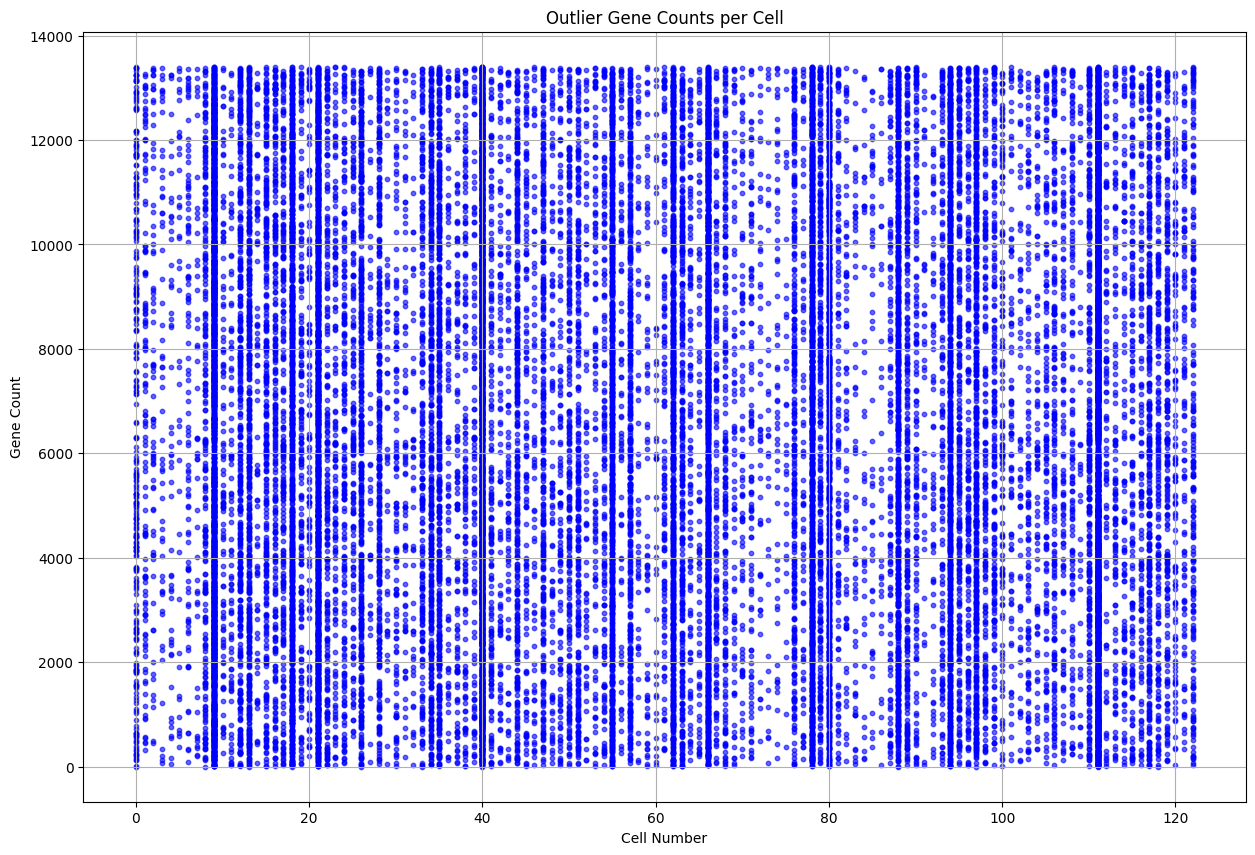

In [62]:
# Plotting the data
plt.figure(figsize=(15, 10))
plt.scatter(cells, genes, s=10, c='blue', alpha=0.6)

# Adding labels and title
plt.title('Outlier Gene Counts per Cell')
plt.xlabel('Cell Number')
plt.ylabel('Gene Count')
plt.grid(True)

# Show plot
plt.show()

There are definitely visible regions of higher outlier density on the graph, particularly in certain cells.


# Outlier interaction with dimensionality reduction

Certain techniques, such as PCA, are not robust against outliers, but techniques like UMAP can tolerate some level of noisy data.


However, PCA does a wonderful job of identifying the features accounting for the most variance, so I'm going to begin by using it. I'm going to use KMeans to cluster after reducing the dimensionality of the data using PCA.

# Principal Component Analysis

Off the bat, we can evaluate how much "cumulative variance" is "explained by 2 principal components," finding this number to be around 24.34%.


In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt

In [9]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# Source: https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240

Explained variation per principal component: [0.20734143 0.03607046]
Cumulative variance explained by 2 principal components: 24.34%


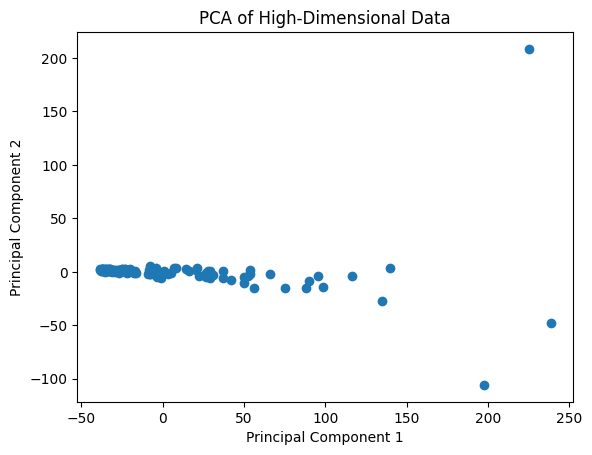

In [10]:
# Plotting the transformed data
plt.scatter(pca_2_result[:, 0], pca_2_result[:, 1])
plt.title('PCA of High-Dimensional Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

We have a high density of data in one region of the plot (kind of a line around PC2 = 0) and very few datapoints elsewhere.

The more principal components we add, the more variance we can explain in the variables. We can plot how explained variance increases as we add more PCs.

<ipython-input-11-da750c9e07ab>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', marker='o')
<ipython-input-11-da750c9e07ab>:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'go-', marker='o')


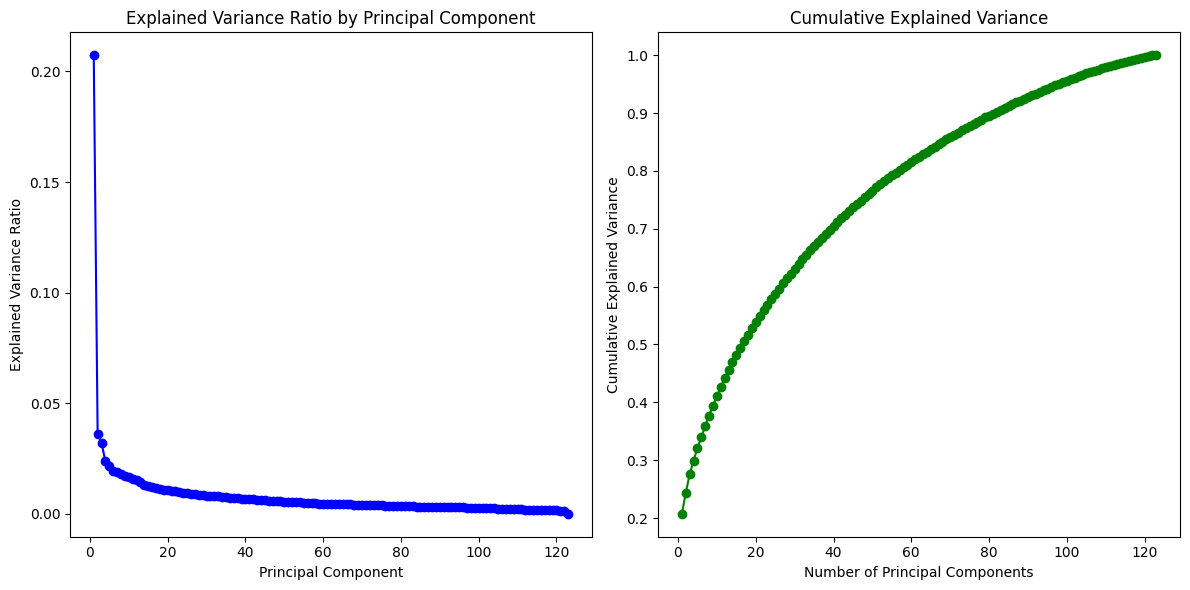

In [11]:
# Compute PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))

# Plot explained variance ratio
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'go-', marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

We can identify an "elbow" point that acts as a good indicator of how many principal components we should use:

In [13]:
# Find the optimal number of components
diffs = np.diff(cumulative_explained_variance)
optimal_components = np.argmax(diffs < 0.01) + 1

print(f'Optimal number of components based on elbow method: {optimal_components}')


Optimal number of components based on elbow method: 22


Using a threshold of 0.01 implies that when the cumulative explained variance stops changing by 0.01 with inclusion of each additional PC, we are at PC22.

# Determining the Optimal Number of Clusters for kMeans

Now we can use the 22 PCs (linear combinations of features in the dataset that explain the greatest variance) to project the data into a lower dimensional space (a 22 dim space). We can use kMeans clustering to try to figure out an appropriate number of clusters.

One way to identify a good number of clusters is the elbow method. It involves plotting the sum of squared distances (inertia) between data points and their corresponding cluster centers as a function of the number of clusters.

Steps:
- Run kMeans clustering for different values of k (number of clusters).
- Plot the inertia against the number of clusters.
Look for an "elbow" in the plot— a point where the inertia starts to decrease more slowly. This suggests the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

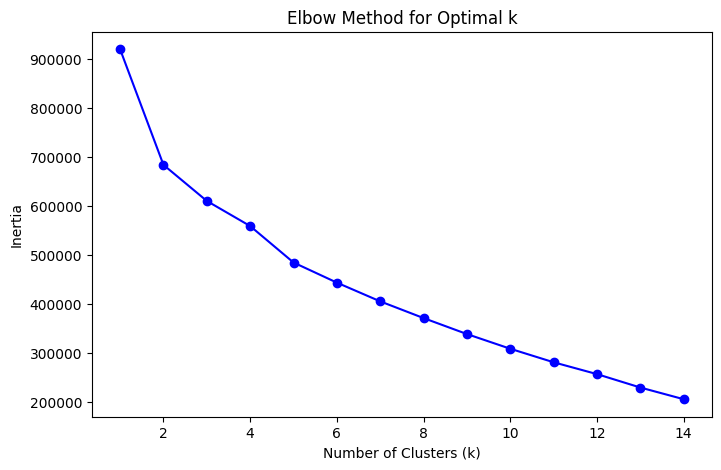

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca_22 = PCA(n_components=22)
pca_22_result = pca_22.fit_transform(df_scaled)

# Use PCA-transformed data, e.g., X_pca
inertia = []

# Try different numbers of clusters
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_22_result)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 15), inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


It seems like the elbow point in the graph is at 5 clusters.

We can also investigate the Silhouette scores. For each k, the score ranges from -1 to 1. A higher Silhouette Score indicates that the clusters are well-defined. It seems like 2 is the maximum number in this graph.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

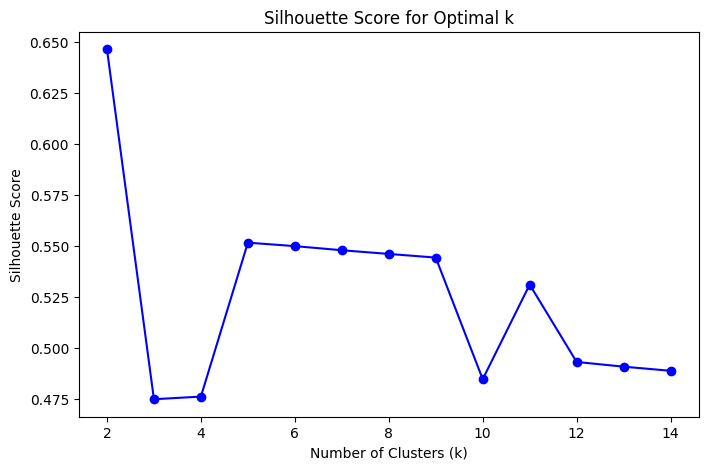

In [13]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Try different numbers of clusters
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_22_result)
    score = silhouette_score(pca_22_result, clusters)
    silhouette_scores.append(score)

# Plot the silhouette score vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


So we therefore can best organize the data into 2 clusters based on our 22 PCA-derived features. This is not visualizable, unfortunately, since we cannot plot in 22 dimensions.

# Top PC Loading

We can also look at the "loadings" of the top principal components to understand the contribution of each original feature to a PC. The magnitude of the coefficients shows how strongly each feature influences the PC, and the sign (positive or negative) shows the direction of the influence. We saw earlier that PC1 explains 20.73% of the variance observed in samples; therefore, it would probably be interesting to look at its loading.





In [14]:
# Get the loadings for PC1
pc1_loadings = pca_22.components_[0]  # This is PC1 (the first principal component)

# Create a DataFrame to examine the loadings with feature names
loadings_df = pd.DataFrame({
    'Feature': df_scaled.columns,
    'PC1_Loading': pc1_loadings
})

# Sort by absolute value to see the most important features
loadings_df['Absolute_Loading'] = loadings_df['PC1_Loading'].abs()
loadings_df = loadings_df.sort_values(by='Absolute_Loading', ascending=False)

print(loadings_df[['Feature', 'PC1_Loading']])

       Feature   PC1_Loading
9660     10193  1.848356e-02
9642     10175  1.847599e-02
9679     10212  1.846741e-02
2389      2500  1.844988e-02
9702     10235  1.841414e-02
...        ...           ...
12770    13454 -4.191882e-06
6691      7097  3.134972e-06
1311      1376 -1.539261e-06
3642      3807  1.503932e-06
2046      2146 -6.517112e-07

[13404 rows x 2 columns]


The above dataframe represents the loadings for PC1 sorted according to their absolute value. It seems like features 10193, 10175, 10212, 2500 and 10235 have the greatest bearing in terms of explaining the variance between the gene counts in different cells. The next PC, PC2, only explains 3.6% of data, so I find it less interesting than PC1.

# Clustering in 2D

I'm interested what the optimal kMeans clustering would look like, visualized, for our 2 dimensional plot (our high dimensional data projected onto 2 dimensions of PC1 and 2).

Using the Silhouette score method, it seems like 2 clusters is optimal.

# Silhouette Score for kMeans





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

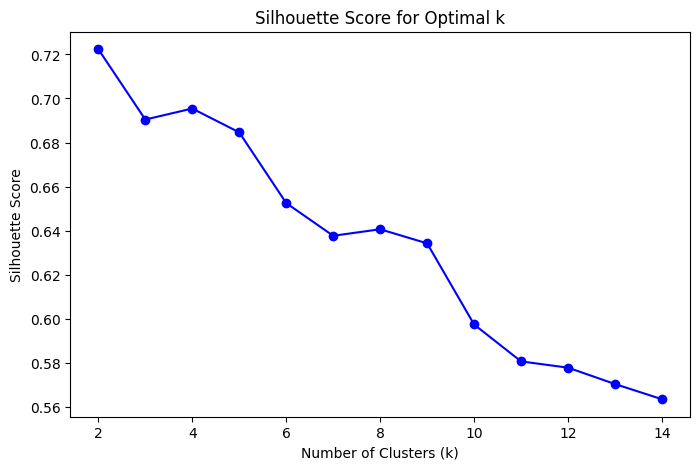

In [15]:
from sklearn.metrics import silhouette_score


silhouette_scores = []

# Try different numbers of clusters
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_2_result)
    score = silhouette_score(pca_2_result, clusters)
    silhouette_scores.append(score)

# Plot the silhouette score vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


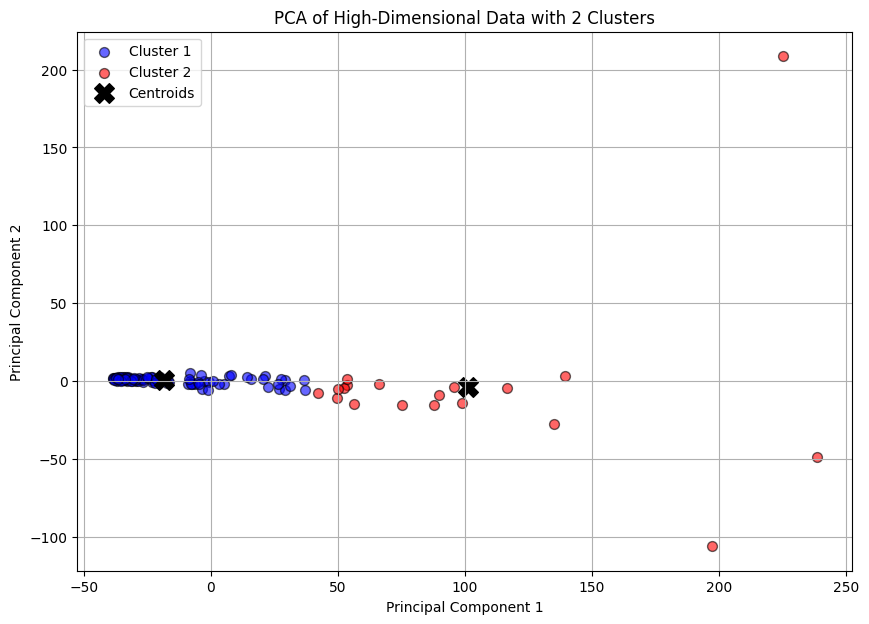

In [16]:
# K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_2_result)

# Plot the data with cluster labels
plt.figure(figsize=(10, 7))

# Scatter plot with colors corresponding to the clusters
plt.scatter(pca_2_result[clusters == 0, 0], pca_2_result[clusters == 0, 1],
            s=50, c='blue', label='Cluster 1', alpha=0.6, edgecolor='k')

plt.scatter(pca_2_result[clusters == 1, 0], pca_2_result[clusters == 1, 1],
            s=50, c='red', label='Cluster 2', alpha=0.6, edgecolor='k')

# Mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='black', marker='X', label='Centroids')

# Adding labels and title
plt.title('PCA of High-Dimensional Data with 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Interpretation

The plot clusters into two clusters.
- Where PC1 ranges from -40 to roughly 40
- Where PC1 ranges from 40 to 240

The centroids of each cluster are located around -20 and 100 on the PC1 axis, respectively.

It might be interesting to see how many data are in one cluster vs the other.

In [17]:
# Number of samples in each cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Number of samples in each cluster:")
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count} samples")

Number of samples in each cluster:
Cluster 0: 104 samples
Cluster 1: 19 samples


The samples are distributed quite unevenly, with the vast majority being in cluster 1.

# UMAP

Given that the top two PCs explain very little of the data cumlulatively, maybe it would be better to try a technique like UMAP, given that UMAP can detect non-linear relationships between features, and our dataset is very complex. It is important to provide UMAP with scaled data, so I will pass it df_scaled.

# Clustering

There are numerous techniques that we can use to cluster unlabeled data. (Source: https://alirezarezvani.medium.com/dataset-without-labels-which-machine-learning-algorithm-should-you-use-bb15651e8522).





In [18]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


In [19]:
import umap

# Apply UMAP to reduce dimensionality to 2 dimensions
umap_2d = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_2d.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# Find the optimal number of clusters for kMeans clustering of UMAP

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

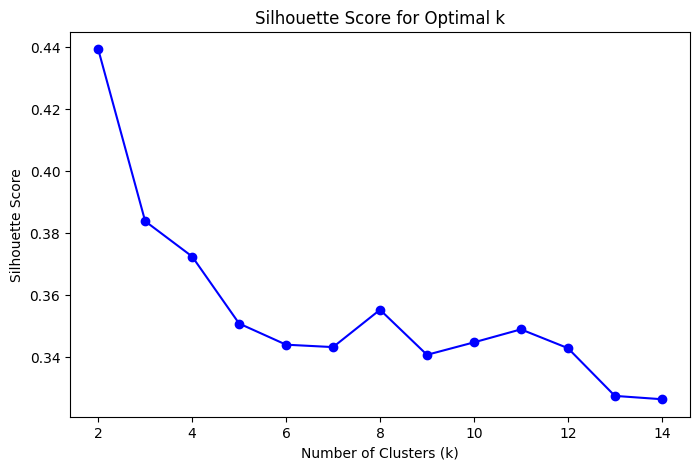

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Try different numbers of clusters
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(umap_result)
    score = silhouette_score(umap_result, clusters)
    silhouette_scores.append(score)

# Plot the silhouette score vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


It seems like 2 clusters is in fact optimal.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


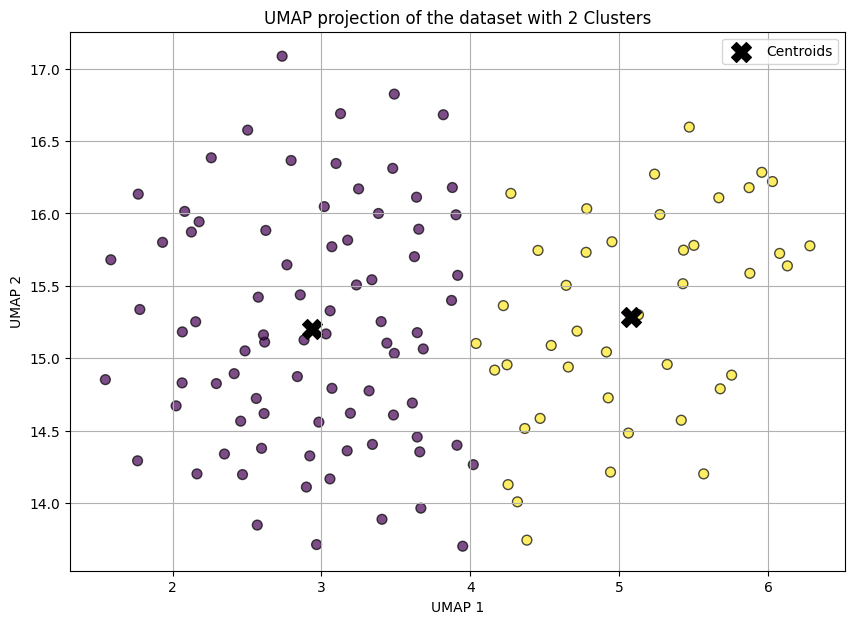

In [21]:
# K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(umap_result)

# Plot the UMAP result with clusters
plt.figure(figsize=(10, 7))

# Scatter plot with colors corresponding to the clusters
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Mark the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

# Adding labels and title
plt.title('UMAP projection of the dataset with 2 Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

I'm interested in the sample distribution across the two clusters. Unlike with PCA, the UMAP axes are not directly meaningful or interpretable as a combination of the original features.



In [22]:
# Number of samples in each cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Number of samples in each cluster:")
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count} samples")

Number of samples in each cluster:
Cluster 0: 81 samples
Cluster 1: 42 samples


This is definitely more balanced than the PCA clusters, where the optimal kMeans clustering split the data into 104 vs 19 samples.

Now, let's determine what the optimal number of clusters is for UMAP in 3D.


In [23]:
# Apply UMAP to reduce dimensionality to 2 dimensions
umap_3d = umap.UMAP(n_components=3, random_state=42)
umap_result = umap_3d.fit_transform(df_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

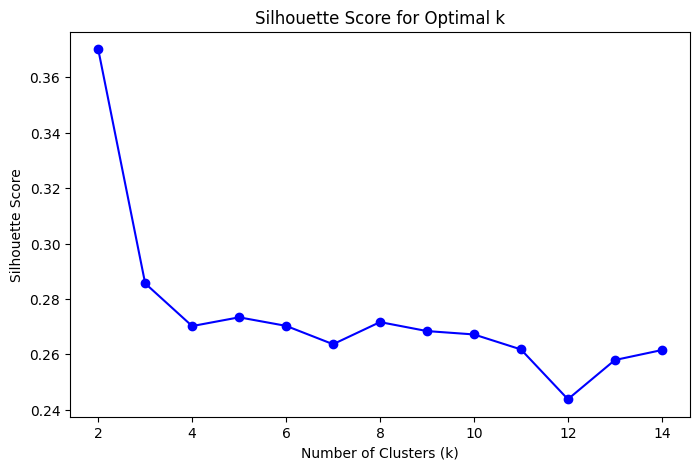

In [27]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Try different numbers of clusters
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(umap_result)
    score = silhouette_score(umap_result, clusters)
    silhouette_scores.append(score)

# Plot the silhouette score vs. number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


Optimal number of clusters still seems to be 2.

# Visualizing the data in 3D, dimensionality-reduced by UMAP

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


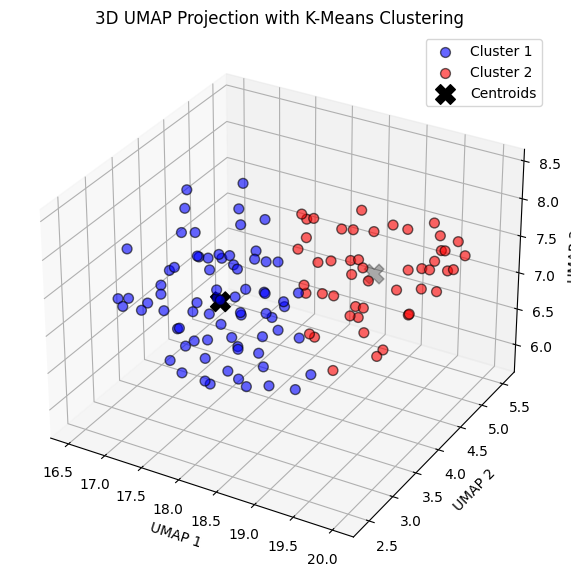

In [30]:
# K-Means Clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(umap_result)

 # Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors corresponding to the clusters
ax.scatter(umap_result[clusters == 0, 0],
           umap_result[clusters == 0, 1],
           umap_result[clusters == 0, 2],
           s=50, c='blue', label='Cluster 1', alpha=0.6, edgecolor='k')

ax.scatter(umap_result[clusters == 1, 0],
           umap_result[clusters == 1, 1],
           umap_result[clusters == 1, 2],
           s=50, c='red', label='Cluster 2', alpha=0.6, edgecolor='k')

# Mark cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],
           s=200, c='black', marker='X', label='Centroids')

# Adding labels and title
ax.set_title('3D UMAP Projection with K-Means Clustering')
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.legend()
plt.show()

In [31]:
# Number of samples in each cluster
unique, counts = np.unique(clusters, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Number of samples in each cluster:")
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count} samples")

Number of samples in each cluster:
Cluster 0: 74 samples
Cluster 1: 49 samples


These are the most well-distributed clusters of all with 74 and 49 samples respectively.

# Insights about Clusters

It seems like when applying the main dimensionality-reduction techniques, kMeans generally finds the best clustering performance for k=2. Therefore, I would say, we can conclude that the data primarily falls into two types (where the labels we would apply to these types are unknown).



# Question 2

Assume for this part that the total count for every sample is 5000 (i.e., sum of column = 5000).

Imagine there was a row (gene G) in this dataset for which the count is expected to be 1 in 10% of samples and 0 in the remaining 90% of samples.  We are doing an experiment where we would like to know if the expression of gene G changes in experimental vs control conditions, and we will measure n samples (single cells) from each condition.

Plot the statistical power to detect a 10% increase in the expression of G in experimental vs control (i.e., average count increases from 0.1 to 0.11 counts per sample) at Bonferroni-corrected p < 0.05 as a function of n, assuming that we will be performing a similar test for significance on 1000 genes total.  How many samples from each condition do we need to measure to achieve a power of 95%?

(Make the simplifying assumption that the counts for this gene follow a Poisson distribution)

Answer:  


Total count across all genes (features) is 5k for each sample (column). Count is 1 for a gene G in 10% of samples and 0 for 90% of samples.

We will measure n single cells from each condition (experimental or control) for gene G.

$M_{\text{null}} = 0.1$

$M_{\text{alt}} = 0.11$

$p < 0.05$

This feels like a hypothesis test off the bat, since we are looking to determine whether the mean is the same across populations.

# Bonferroni correction & Power

Bonferroni's adjustment is calculated by taking the number of tests and dividing it into the alpha value. If the significance level is 0.05 and 41 statistical tests are performed, then statistical significance is achieved if P is less than 0.05/41, or 0.001.

Given that we will perform hypothesis testing on 1000 genes, we need to apply the Bonferroni correction using num_tests = 1000. Alpha here is 0.05, so the Bonferroni-corrected significance level is 0.00005. p < 0.00005 will be a statistically significant result.

Power is a measure of the ability of an experimental design and hypothesis testing setup to detect a particular effect if it is truly present, i.e. if the alternative hypothesis is in fact true.

We can typically solve for power if we have alpha, effect size and sample size. We can solve for sample size using alpha, effect size and power. We will use Cohen's d in the place of effect size for these calculations, where Cohen's d for a Poisson distribution is calculated using the following:

$$ d = \frac{|\lambda_1 - \lambda_0|}{\sqrt{\frac{\lambda_0 + \lambda_1}{2}}} $$


where
- $\lambda_0$ = Mean of the null hypothesis Poisson distribution
- $\lambda_1$  = Mean of the alternative hypothesis Poisson distribution

This is aproximately equal to 0.03086 when we plug in the numbers.


In [4]:
import numpy as np

# Effect size for Poisson distributions
lambda0 = 0.1  # Null hypothesis mean
lambda1 = 0.11  # Alternative hypothesis mean
effect_size = (lambda1 - lambda0) / np.sqrt((lambda0 + lambda1) / 2)
effect_size

0.030860669992418363

In [5]:
from statsmodels.stats.power import NormalIndPower
from scipy.stats import norm

def calculate_sample_size(alpha, power):
    # Power analysis for normal approximation
    analysis = NormalIndPower()
    sample_size = analysis.solve_power(effect_size, alpha=alpha, power=power, ratio=1, alternative='larger')

    return sample_size

# Parameters
alpha = 0.00005  # Significance level
power = 0.95  # Desired power

# Calculate required sample size
required_sample_size = calculate_sample_size(alpha, power)
print(f'Required sample size: {required_sample_size:.0f}')

Required sample size: 64346


The requird sample size to achieve 95% power with this significance level of 0.00005 is 64346. That is quite high.

# NormIndPower

Note that NormalIndPower from statsmodels uses the normal approximation to estimate the sample size. This approach is valid for Poisson-distributed data when the sample size is sufficiently large. I am making that assumption here.

We set alternative to `larger` because in our alternative hypothesis, the mean increases by 10% vs our null hypothesis mean. We set `ratio` to 1 because the sample sizes between the two groups (control and experimental) should be equal (sampling n from each).

# Plotting power as function of sample size

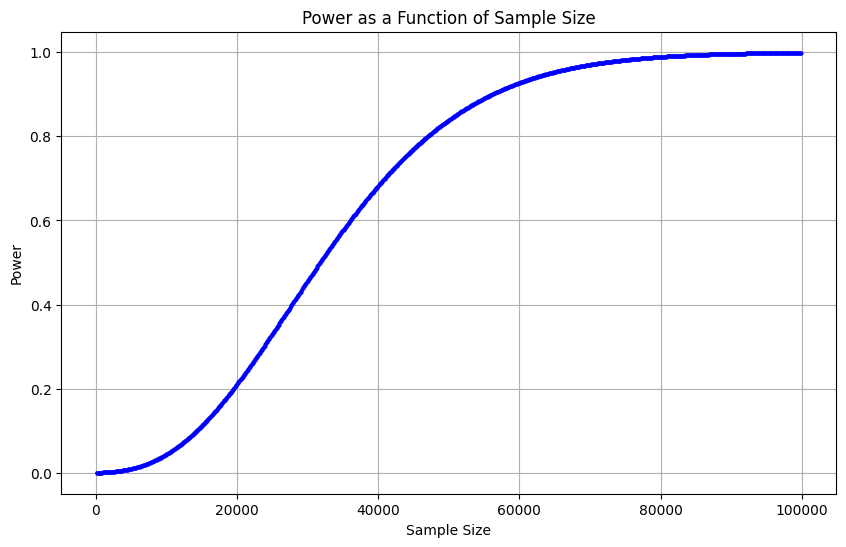

In [13]:
analysis = NormalIndPower()
import matplotlib.pyplot as plt

sample_sizes=[]
powers = []


for sample_size in range(100, 100000, 100): # step by 100, starting at 100
  sample_sizes.append(sample_size)
  power = analysis.solve_power(effect_size=0.03086, alpha=0.00005, nobs1=sample_size, ratio=1, alternative='larger')
  powers.append(power)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, powers, marker='o', linestyle='-', color='b', markersize=2)
plt.title('Power as a Function of Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.grid(True)
plt.show()

This is an interesting shaped-curve that looks a great deal like a logistic regression.

# Sanity Check

Let's santiy check to ensure that the sample size is 64346 at power=0.95.

In [14]:
for idx, power in enumerate(powers):
  if power >= 0.95:
    print("sample size found, ", sample_sizes[idx])
    break

sample size found,  64400
